In [27]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [6]:
orders=pd.read_csv("data/olist_orders_dataset.csv")
order_items=pd.read_csv("data/olist_order_items_dataset.csv")
order_payments=pd.read_csv("data/olist_order_payments_dataset.csv")
customers=pd.read_csv("data/olist_customers_dataset.csv")
geolocation=pd.read_csv("data/olist_geolocation_dataset.csv")
order_reviews=pd.read_csv("data/olist_order_reviews_dataset.csv")
products=pd.read_csv("data/olist_products_dataset.csv")
sellers=pd.read_csv("data/olist_sellers_dataset.csv")
translations=pd.read_csv("data/product_category_name_translation.csv")

In [7]:
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [8]:
#clean geolocation (avg lat/lng per zip)
geolocation=geolocation.groupby("geolocation_zip_code_prefix").agg({
    "geolocation_lat":"mean",
    "geolocation_lng":"mean"
}).reset_index()

geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733


In [11]:
#translate product categories
products=products.merge(translations, on='product_category_name', how='left')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [10]:
translations.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [ ]:
# Merge base tables
df = orders.merge(order_items,on="order_id",how="left")
df = df.merge(order_payments,on="order_id",how="left")
df = df.merge(customers,on="customer_id",how="left")
df = df.merge(order_reviews,on="order_id",how="left")
df = df.merge(products,on="product_id",how="left")
df = df.merge(sellers,on="seller_id",how="left")

In [13]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,268.0,4.0,500.0,19.0,8.0,13.0,housewares,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,178.0,1.0,400.0,19.0,13.0,19.0,perfumery,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,232.0,1.0,420.0,24.0,19.0,21.0,auto,14840.0,guariba,SP


In [14]:
# Add customer geo
df = df.merge(
    geolocation,
    left_on="customer_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
).rename(columns={
    "geolocation_lat":"customer_lat",
    "geolocation_lng":"customer_lng"
}).drop("geolocation_zip_code_prefix",axis=1)

# Add seller geo
df = df.merge(
    geolocation,
    left_on="seller_zip_code_prefix",
    right_on="geolocation_zip_code_prefix",
    how="left"
).rename(columns={
    "geolocation_lat":"seller_lat",
    "geolocation_lng":"seller_lng"
}).drop("geolocation_zip_code_prefix",axis=1)



In [15]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.0,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,13.0,19.0,perfumery,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,19.0,21.0,auto,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601


In [16]:
print("Final shape:", df.shape)

Final shape: (119143, 44)


In [17]:
df.to_csv("master_dataset.csv",index=False)

EDA

In [20]:
df.shape

(119143, 44)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 44 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   customer_id                    119143 non-null  object 
 2   order_status                   119143 non-null  object 
 3   order_purchase_timestamp       119143 non-null  object 
 4   order_approved_at              118966 non-null  object 
 5   order_delivered_carrier_date   117057 non-null  object 
 6   order_delivered_customer_date  115722 non-null  object 
 7   order_estimated_delivery_date  119143 non-null  object 
 8   order_item_id                  118310 non-null  float64
 9   product_id                     118310 non-null  object 
 10  seller_id                      118310 non-null  object 
 11  shipping_limit_date            118310 non-null  object 
 12  price                         

In [33]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_lat', 'customer_lng',
       'seller

Dates are added as objects. They need to be changed to date time dtypes.

In [29]:
df.describe()

,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_lat,customer_lng,seller_lat,seller_lng
count,118310.000000,118310.000000,118310.000000,119140.000000,119140.000000,119140.000000,119143.000000,118146.000000,116601.000000,116601.000000,116601.000000,118290.000000,118290.000000,118290.000000,118290.000000,118310.000000,118821.000000,118821.000000,118045.000000,118045.000000
mean,1.196543,120.646603,20.032387,1.094737,2.941246,172.735135,35033.451298,4.015582,48.767498,785.967822,2.205161,2112.250740,30.265145,16.619706,23.074799,24442.410413,-21.230187,-46.191214,-22.795042,-47.238176
std,0.699489,184.109691,15.836850,0.730141,2.777848,267.776077,29823.198969,1.400436,10.033540,652.584121,1.717452,3786.695111,16.189367,13.453584,11.749139,27573.004511,5.564179,4.042785,2.690838,2.339804
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1003.000000,1.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-33.689948,-72.668881,-32.079231,-67.813284
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000,11250.000000,4.000000,42.000000,346.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.589488,-48.097776,-23.606344,-48.829744
50%,1.000000,74.900000,16.280000,1.000000,2.000000,108.160000,24240.000000,5.000000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,-22.928413,-46.631239,-23.425556,-46.750602
75%,1.000000,134.900000,21.180000,1.000000,4.000000,189.240000,58475.000000,5.000000,57.000000,983.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,27972.000000,-20.180863,-43.608100,-21.757321,-46.518679
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,99990.000000,5.000000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,42.184003,-8.723762,-2.501242,-34.855616


In [22]:
df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
review_id                           997
review_score                        997
review_comment_title             105154


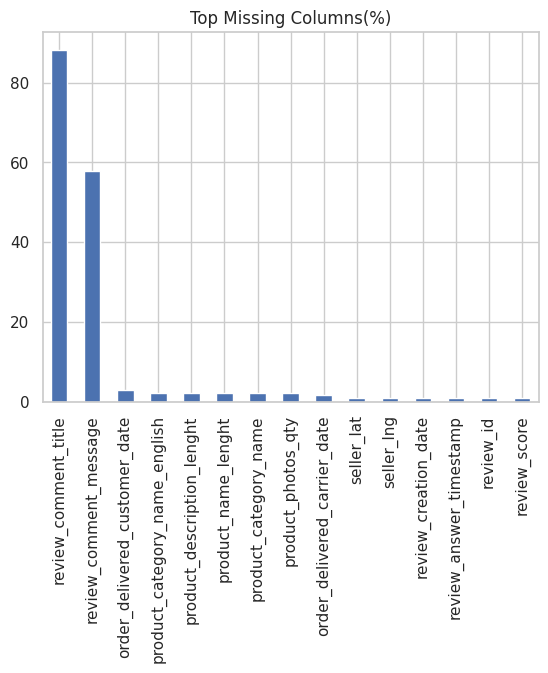

In [31]:
data_missing = (df.isnull().sum()/len(df))*100 #percentage of null values
data_missing=data_missing[data_missing>0].sort_values(ascending=False)

plt.Figure(figsize=(10,6))
data_missing.head(15).plot(kind='bar')
plt.title("Top Missing Columns(%)")
plt.show()

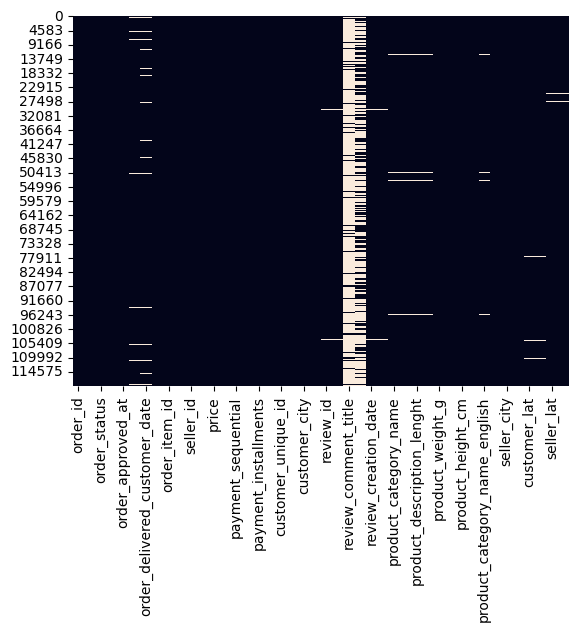

In [18]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

TARGET VARIABLE DISTRIBUTION

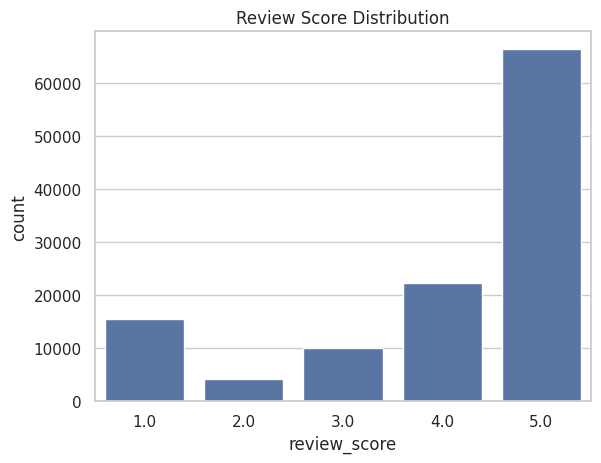

In [34]:
#Review Score Distribution
sns.countplot(x='review_score', data=df)
plt.title("Review Score Distribution")
plt.show()

- The review_score variable shows a clear class imbalance.
- 5-star ratings constitute the majority of observations.
- 4-star ratings are the second most frequent.
- Ratings of 1 and 2 stars are significantly underrepresented.
- The distribution is heavily skewed toward positive feedback.
- This indicates overall high customer satisfaction.
- Due to class imbalance, accuracy alone is not a reliable evaluation metric.
- Therefore, Precision, Recall, F1-score, and Confusion Matrix will be used for robust model evaluation.

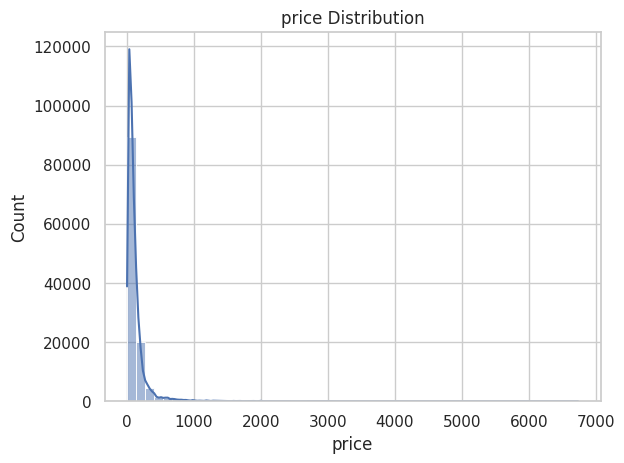

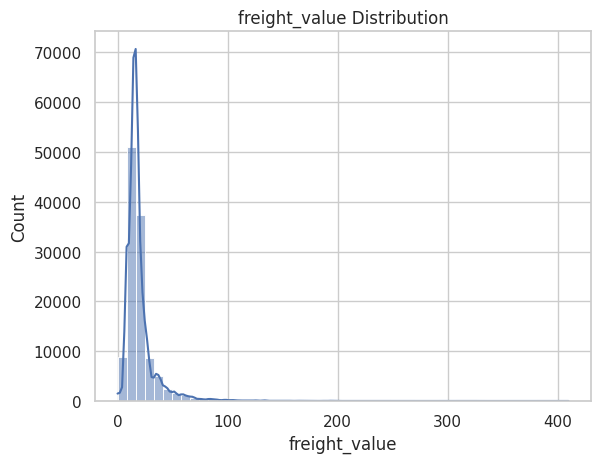

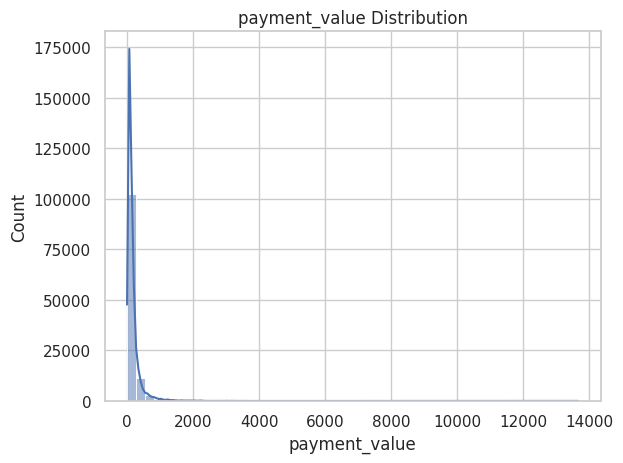

In [39]:
#nmerical features distribution
num_cols=["price", "freight_value", "payment_value"]

for col in num_cols:
    plt.figure()
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"{col} Distribution")
    plt.show()


The distributions of price, freight_value, and payment_value are highly right-skewed, with the majority of observations concentrated at lower values and a long tail extending toward higher values. Most products are priced at lower ranges, while a small number of premium items contribute to extreme values. Similarly, freight charges are generally low, with few unusually high shipping costs. The payment_value variable also exhibits strong skewness, indicating that most transactions are moderate in size, with a limited number of high-value purchases. The presence of long tails suggests potential outliers, which may influence model performance and therefore require consideration during preprocessing or transformation.

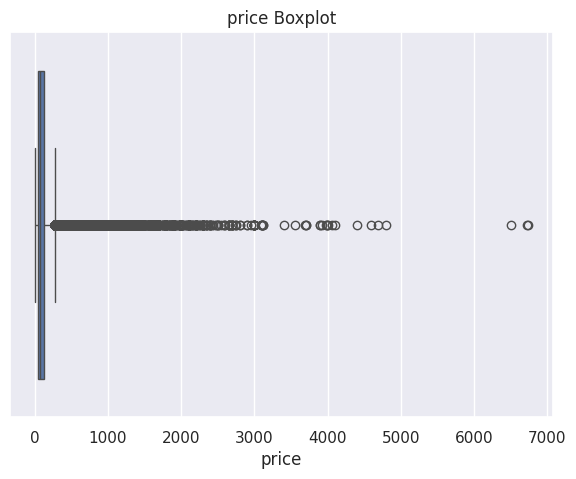

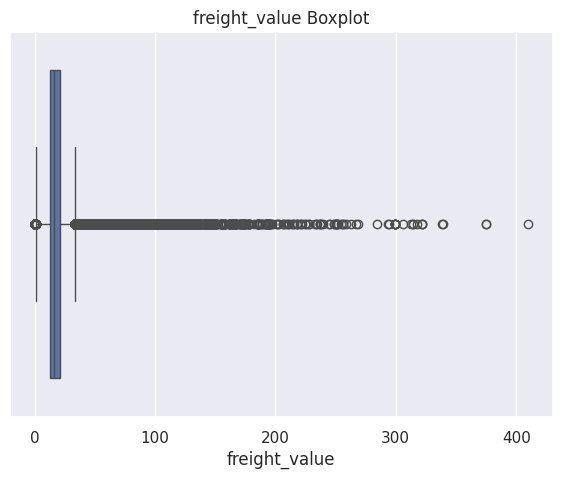

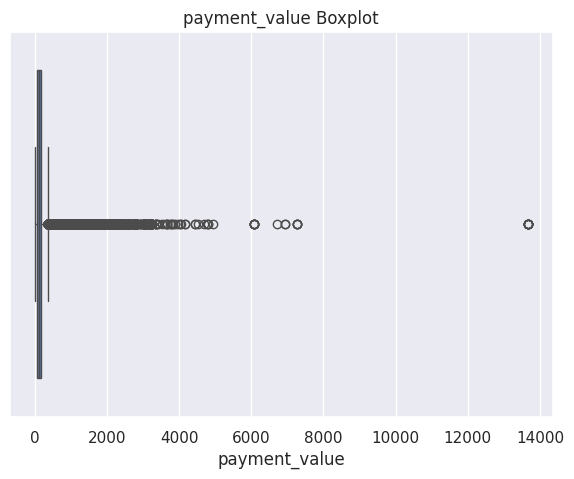

In [ ]:
#boxplot to check outliers
for col in num_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.show()

Boxplots were created for price, freight_value, and payment_value to check for outliers. In all three variables, most values are concentrated in the lower range, while several points are spread far to the right. These distant points represent very high values compared to the majority of the data. This shows that a small number of orders have extremely high prices, shipping costs, or payment amounts. The data is therefore right-skewed and contains outliers, which may affect model performance and should be considered during preprocessing.

In [59]:
#calculating delivery time
df['order_delivered_customer_date']=pd.to_datetime(df['order_delivered_customer_date'])
df['order_purchase_timestamp']=pd.to_datetime(df['order_purchase_timestamp'])

df['delivery_time']=(df['order_delivered_customer_date']-df['order_purchase_timestamp']).dt.days

In [60]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,customer_lat,customer_lng,seller_lat,seller_lng,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,8.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,8.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,13.0,housewares,9350.0,maua,SP,-23.576983,-46.587161,-23.680729,-46.444238,8.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,19.0,perfumery,31570.0,belo horizonte,SP,-12.177924,-44.660711,-19.807681,-43.980427,13.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,21.0,auto,14840.0,guariba,SP,-16.745150,-48.514783,-21.363502,-48.229601,9.0


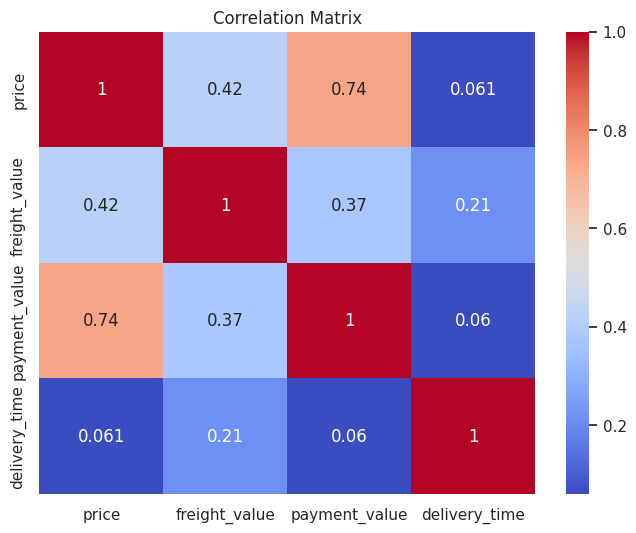

In [61]:
#Correlation Matrix
corr=df[["price", "freight_value", "payment_value", "delivery_time"]].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

The correlation matrix shows the relationship between price, freight value, payment value, and delivery time.
- Price and payment value have a strong positive correlation (0.74), which means when price increases, payment value also increases. This makes sense because customers usually pay more for higher priced products.
- Price and freight value have a moderate positive correlation (0.42). This means higher priced products may slightly have higher shipping costs.
- Freight value and payment value also show a moderate relationship (0.37).
- Delivery time has very low correlation with price (0.06) and payment value (0.06), and a weak correlation with freight value (0.21). This means delivery time is mostly independent and does not strongly depend on product price or payment amount.
- Overall, price and payment value are the most strongly related variables in the dataset.

BIVARIATE ANALYSIS

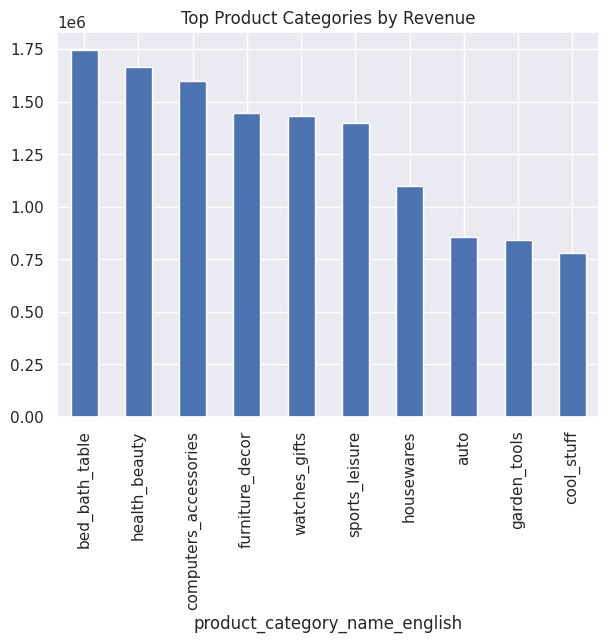

In [ ]:
#Top product categories by revenue
prod_cat_by_revenue=df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10)
prod_cat_by_revenue.plot(kind='bar')
plt.title("Top Product Categories by Revenue")
plt.show()

The bar chart shows the total revenue generated by each product category.
Bed bath table, health beauty, and computers accessories generate the highest revenue. These categories contribute the most to overall sales.
Furniture decor, watches gifts, and sports leisure also perform well but slightly lower than the top three categories.
Auto, garden tools, and cool stuff generate comparatively lower revenue among the top categories shown.
Overall, a few categories are responsible for a large portion of the total revenue, which means sales are concentrated in specific product groups.

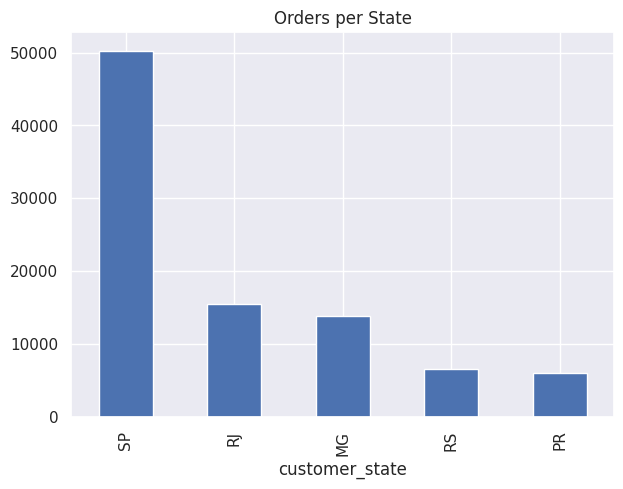

In [52]:
#orders by customer state
state_orders=df["customer_state"].value_counts().head()
state_orders.plot(kind='bar')
plt.title("Orders per State")
plt.show()

The bar chart shows the number of orders from different customer states.
São Paulo (SP) has the highest number of orders by a very large margin. It contributes much more orders compared to other states.
Rio de Janeiro (RJ) and Minas Gerais (MG) have the next highest number of orders, but they are far lower than SP.
Rio Grande do Sul (RS) and Paraná (PR) have fewer orders compared to the top three states.
Overall, most of the orders are concentrated in São Paulo, which means it is the most important state in terms of sales volume.

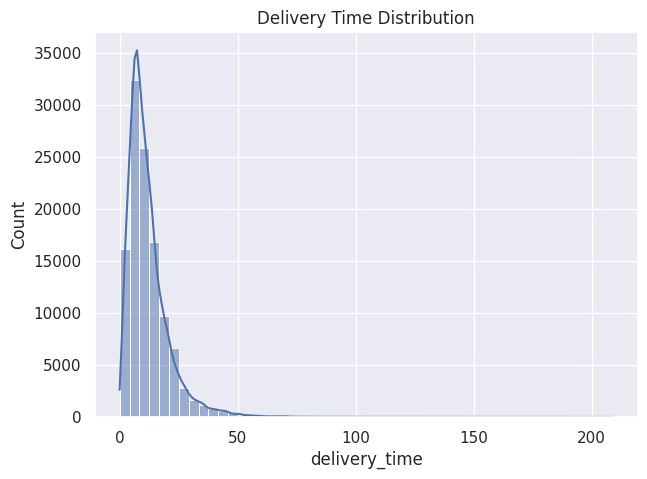

In [62]:
#delivery time analysis
sns.histplot(df['delivery_time'], bins=50, kde=True)
plt.title("Delivery Time Distribution")
plt.show()

The histogram shows the distribution of delivery time.
Most orders are delivered within a small number of days, mainly between 5 to 20 days. The highest number of deliveries is concentrated in this range.
The graph is right-skewed, which means there are a few orders that took a very long time to be delivered (more than 50 days). These are rare cases compared to normal delivery times.
Overall, most deliveries happen quickly, but a small number of orders take much longer than usual.

**Exploratory Data Analysis (EDA) Summary**
1. Dataset Overview
- The dataset contains information about orders, product prices, freight values, payment values, delivery time, product categories, customer states, and review scores.
- Both numerical and categorical features are present.

2. Target Variable Analysis (Review Score)
- Most customers gave ratings of 4 and 5, indicating high overall satisfaction.
- Low ratings (1 and 2) are comparatively fewer.
- The target variable is imbalanced, which should be considered during model building.

3. Numerical Feature Distribution
- Price - Highly right-skewed distribution. Few very high-priced products (outliers) are present.
- Freight Value - Also right-skewed. Majority of freight costs are small. Some extreme high freight charges exist.
- Payment Value - Strongly right-skewed. Large payments are rare but present. Closely related to product price.
- Delivery Time - Most deliveries happen within 5–20 days. A few orders take significantly longer (long tail).Distribution is right-skewed.

4. Outlier Analysis
- Boxplots show multiple outliers in price, freight value, and payment value.
- These extreme values may affect model performance and may require treatment.

5. Correlation Analysis
- Payment value and price show strong positive correlation.
- Freight value has moderate correlation with price and payment value.
- Delivery time has very weak correlation with monetary variables.
- No extremely high multicollinearity observed except between payment and price.

6. Revenue & Category Insights
- Some product categories contribute significantly more revenue than others.
- Revenue is concentrated in a few top-performing categories.

7. Geographic Analysis
- São Paulo (SP) has the highest number of orders by a large margin.
- Other major states (RJ, MG, RS, PR) contribute less compared to SP.
- Orders are concentrated in specific regions.

8. Overall Observations
- Data shows skewness and presence of outliers.
- Monetary variables are strongly related to each other.
- Review score is imbalanced.
- Orders and revenue are concentrated in specific states and product categories.